In [1]:
import sys
import os
sys.path.append(os.environ["CODE_REPOSITORY"])
from code_repository.hotones.thetools import *
import matplotlib.pyplot as plt
from snudda.utils.load import SnuddaLoad

In [2]:
external = os.path.join("/media","jofrony","2TB","dardel","current_bgd2","population_unit", "distance", "supercomputer", "networks")

In [3]:
folder = "connectivity"

In [4]:
e = Experiments()
e.add_experiment(name="0",
                 color="black",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-10-01-16-03-12_p1.hdf5")

e.add_experiment(name="45",
                 color="red",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31-45-3D"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-30-00_p1.hdf5")

e.add_experiment(name="90",
                 color="purple",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31-90-3D"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-31-13_p1.hdf5")


   

In [5]:
sl = LoadSimulations(experiments=e)
sl.load_network_file(load_synapses=True)

Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/distance/supercomputer/networks/pdc_network_2022-08-31/simulation/network_output_network-synapses_cell_ids_current_injection_dardel_2022-10-01-16-03-12_p1.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/distance/supercomputer/networks/pdc_network_2022-08-31-45-3D/simulation/network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-30-00_p1.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/distance/supercomputer/networks/pdc_network_2022-08-31-90-3D/simulation/network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-31-13_p1.hdf5


In [6]:
colors = ["grey","green" ,"blue"]

In [7]:
%%time
neuron_type = "dSPN"
connectivity_dspn = connectivity_analysis(data_obj=sl, pre=["dSPN", "iSPN", "FS"], post=neuron_type, max_post=150)

CPU times: user 3min 11s, sys: 35.5 s, total: 3min 47s
Wall time: 4min 53s


In [8]:
customize = {plt.ylim:(0,500)}

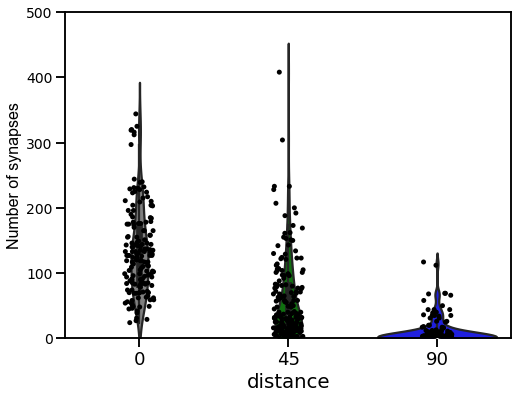

In [10]:
plot_synapses_violin(connectivity_dspn[0], experiment_names=e, colors=colors, name=neuron_type, folder=folder, save=True,customize=customize)

In [11]:
%%time
neuron_type = "iSPN"
connectivity_ispn = connectivity_analysis(data_obj=sl, pre=["dSPN", "iSPN", "FS"], post=neuron_type, max_post=150)

CPU times: user 3min 29s, sys: 25.5 s, total: 3min 54s
Wall time: 3min 59s


In [21]:
customize = {plt.ylim:(0,500)}

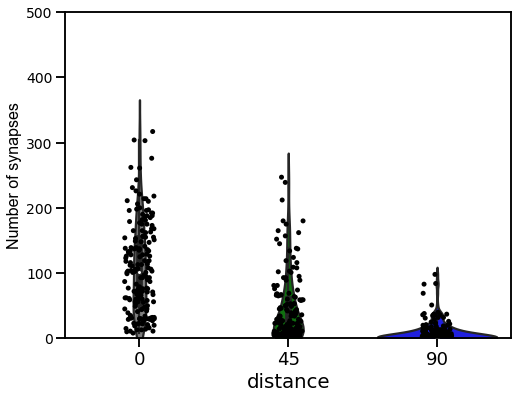

In [23]:

plot_synapses_violin(connectivity_ispn[0], experiment_names=e, colors=colors, name=neuron_type, folder=folder, save=True,customize=customize)

In [15]:
global_connectivity = {k: dict() for k in sl.get_experiment_names()}

In [16]:
for c in global_connectivity:
    for ids in connectivity_ispn[0][c]:
        global_connectivity[c].update({ids: connectivity_ispn[0][c][ids]})

In [17]:
for c in global_connectivity:
    for ids in connectivity_dspn[0][c]:
        global_connectivity[c].update({ids: connectivity_dspn[0][c][ids]})

In [24]:
neuron_type="SPN"

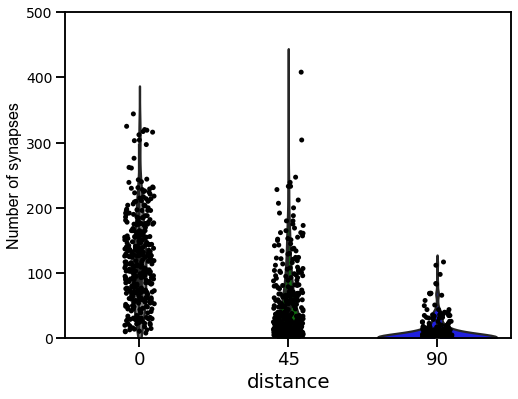

In [25]:
plot_synapses_violin(global_connectivity, experiment_names=e, colors=colors, name=neuron_type, folder=folder, save=True,customize=customize)